[TOC]

# 第4章 NumPy基础: 数组和矢量化运算


**NumPy**由**ndarray**和**ufunc**两种对象构成。
数据以ndarray的形式存储，无须编写循环运算，更高效便捷的做法是**矢量化**(vectorized)运算;
ufunc则是作用于ndarray的矢量化运算。
理解和掌握NumPy，要透彻以下三个概念：
1. indexing(索引) and slicing(切片)，详见**基础索引和切片**、**布尔索引**和**花式索引**。
2. reshape(改变形状), axis(轴) and transpose(转置)，详见**改变数组形状**和**数组转置和轴交换**。
3. broadcasting(广播)

In [5]:
import numpy as np

In [5]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [11]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 12.3 ms, sys: 2.53 ms, total: 14.8 ms
Wall time: 13.8 ms


In [12]:
%time for _ in range(10): my_list2 = my_list * 2

CPU times: user 164 ms, sys: 14.4 ms, total: 178 ms
Wall time: 177 ms


分别对ndarray，list做十次乘法运算，可见在ndrray上的运算远比list上的运算快。


**注意**：list也有 \* 运算，是对list的整体复制。

In [10]:
my_list = list(range(3))
print(my_list)
print(my_list * 2)

[0, 1, 2]
[0, 1, 2, 0, 1, 2]


## 4.1 The NumPy ndarray: 一个多维数组对象

In [16]:
# import NumPy and set alias as np
import numpy as np

# set random seed
np.random.seed(220184597)  # for reproducibility

# Generate some random data
data = np.random.random((2, 3))
data

array([[0.07851386, 0.21256604, 0.78352318],
       [0.05221716, 0.55492055, 0.59327806]])

In [24]:
type(data)

numpy.ndarray

ndarray包括一些**基本信息**:**dtype**(数据类型), **shape**(形状), **ndim**(维度), **size**(大小)

In [19]:
data.dtype

dtype('float64')

In [20]:
data.shape

(2, 3)

In [21]:
data.ndim

2

In [22]:
data.size

6

![The NumPy ndarray object](res/imgs/chp4_numpy_basics/numpy_ndarray_object.png)

ndarray矢量化进行+、-、\*、%**算术运算**。

In [25]:
data + data

array([[0.15702772, 0.42513207, 1.56704635],
       [0.10443433, 1.10984111, 1.18655613]])

In [27]:
data * 2

array([[0.15702772, 0.42513207, 1.56704635],
       [0.10443433, 1.10984111, 1.18655613]])

### 创建数组

In [33]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)

In [32]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [34]:
arr1.dtype, arr1.shape

(dtype('float64'), (5,))

In [30]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)

In [31]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [35]:
arr2.dtype, arr2.shape

(dtype('int64'), (2, 4))

In [36]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [38]:
np.empty((2, 3, 2))

array([[[1.28822975e-231, 1.73059510e-077],
        [2.96439388e-323, 0.00000000e+000],
        [2.12199579e-314, 5.64233733e-067]],

       [[6.20135423e-091, 4.01519980e-057],
        [6.58907640e-043, 2.67694229e+184],
        [3.99910963e+252, 9.02419453e-309]]])

**注意**：empty()并不是初始化为空，而是随机生成特别小的值的数组

In [39]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

np.arange()跟range()用法一致，前者返回ndrray，后者返回range（一种可迭代对象）<br/>
可迭代对象(**Iterable**)：for循环遍历<br/>
迭代器(**Iterator**)：惰性序列，next访问下一位元素，越界抛出**StopIteration**异常<br/>
如果一个对象是迭代器，那么它可迭代，反之不一定成立<br/>
iter()产生可迭代对象的迭代器。

In [49]:
from collections.abc import Iterable, Iterator
range_obj = range(3)
range_obj

range(0, 3)

In [51]:
range_obj[-1]

2

In [45]:
isinstance(range_obj, Iterable)

True

In [48]:
isinstance(range_obj, Iterator)

False

In [54]:
isinstance(iter(range_obj), Iterator)

True

**表4-1**列出了创建数组的一些函数

  ![Array creating functions](res/imgs/chp4_numpy_basics/array_creating_functions.png)

### ndarray数据类型

data type是**数据的信息**(metadata)

In [55]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [58]:
arr1.dtype

dtype('float64')

In [59]:
arr2.dtype

dtype('int32')

In [60]:
arr1

array([1., 2., 3.])

In [61]:
arr2

array([1, 2, 3], dtype=int32)

**表4-2**列出了numpy的数据类型

![NumPy data types](res/imgs/chp4_numpy_basics/numpy_data_types.png)

![The NumPy dtype class hierarchy](res/imgs/chp4_numpy_basics/the_numpy_dtype_class_hierarchy.png)

**数据类型强制转换**

In [74]:
# convert or cast dtype
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

In [75]:
arr.dtype

dtype('int64')

In [76]:
float_arr = arr.astype(np.float64)

In [77]:
float_arr

array([1., 2., 3., 4., 5.])

In [78]:
float_arr.dtype

dtype('float64')

当不显式指定dtype创建数组时，函数会自动检测数据设置dtype。
- int default np.int64
- float default np.float64
- str default np.string_
- 数据类型多样 default np.object

In [79]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [63]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [80]:
numeric_strings = np.array(['3.7', '-1.2', '-2.6', '0.5', '12.9', '10.1'], dtype=np.string_)

In [81]:
numeric_strings

array([b'3.7', b'-1.2', b'-2.6', b'0.5', b'12.9', b'10.1'], dtype='|S4')

np.string_和np.unicode_：<br/>
二者有相同的语义规范，但编码方式不同。
- np.string_采用ASCII编码，每个字符占1个字节
- np_unicode_采用Unicode编码，每个字符所占字节数跟系统平台有关

In [82]:
numeric_strings.astype(float)  # default np.float64

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [83]:
numeric_strings.astype(float).dtype

dtype('float64')

**注意**：arr.astype()创建一个新的数组

In [85]:
arr = np.array([1, 2, 3, 4, 5])
float_arr = arr.astype(np.float64)

In [87]:
arr

array([1, 2, 3, 4, 5])

In [88]:
float_arr

array([1., 2., 3., 4., 5.])

In [89]:
arr[0] = -1

In [90]:
arr

array([-1,  2,  3,  4,  5])

In [91]:
float_arr

array([1., 2., 3., 4., 5.])

修改arr，float_arr不发生改变，佐证arr.astype()创建一个新的数组。

那么如何在**原数组**上修改dtype(**in place**)? <br/>
use **arr.view()**<br/>
not success

In [92]:
arr = np.array([1, 2, 3, 4, 5])
float_arr = arr.view(np.float64)

In [93]:
arr

array([1, 2, 3, 4, 5])

In [94]:
float_arr

array([4.9e-324, 9.9e-324, 1.5e-323, 2.0e-323, 2.5e-323])

### ndarray算术运算

ndarray矢量化进行+、-、\*、/、%、\*\***算术运算**。

In [2]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [3]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [4]:
arr + arr

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [5]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [6]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [7]:
arr / 1

array([[0., 0., 0.],
       [0., 0., 0.]])

In [8]:
arr % 2

array([[1., 0., 1.],
       [0., 1., 0.]])

In [9]:
arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

### 基础索引和切片

给数组**一个值**取值称为索引
给数组**一个范围值**取值称为切片

**一维数组**索引和切片与列表(list)一致

In [24]:
arr = np.arange(10)

In [12]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
arr[5]

5

In [25]:
arr_slice = arr[5:8]

In [26]:
arr_slice

array([5, 6, 7])

In [27]:
arr[5:8] = 12

In [28]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

**切片**返回数组的**视图**(view)<br/>
改变slice，arr也随之改变

In [29]:
arr = np.arange(10)

In [30]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
arr_copy = arr[5:8].copy()

In [32]:
arr_copy

array([5, 6, 7])

In [33]:
arr_copy[0] = 123456

In [34]:
arr_copy

array([123456,      6,      7])

In [35]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

arr.copy()返回数组的**副本**<br/>
改变副本，arr不发生改变

**多维数组**索引和切片沿着轴(axis)操作，每个轴就是一个维度(dimension)。

In [4]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [38]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [39]:
# 2d indexing
arr2d[0][2]

3

In [40]:
arr2d[0,2]

3

轴从最外围开始，从0计算。<br/>
在多维数组中，如果省略后面的索引，则返回的对象将是一个较低维度的ndarray，它包含沿更高维度的所有数据。

In [41]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [42]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [43]:
# 3d indexing
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [44]:
old_values = arr3d[0].copy()  # copy

In [45]:
arr3d[0] = 42  # assign

In [46]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [47]:
arr3d[0] = old_values  # recover

In [48]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [50]:
arr3d[0, 1]  # arr3d[0][1]

array([4, 5, 6])

**多维索引类似于数组逐轴选择**

In [54]:
arr_dim0 = arr3d[0]

In [56]:
arr_dim0

array([[1, 2, 3],
       [4, 5, 6]])

In [57]:
arr_dim01 = arr_dim0[1]  # arr3d[0, 1]  # arr3d[0][1]

In [58]:
arr_dim01

array([4, 5, 6])

**使用切片索引**

In [61]:
arr = np.array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [62]:
# 1d slicing
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [63]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [64]:
# 2d slicing
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

多切片取值

In [5]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [6]:
arr2d[1, :2]  # the second row but only the first two columns

array([4, 5])

In [7]:
arr2d[:2, 2]  # the third column but only the first two rows

array([3, 6])

In [8]:
arr2d[:, :1]  # : means to take the entire axis

array([[1],
       [4],
       [7]])

In [12]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

![2d array slicing](res/imgs/chp4_numpy_basics/2d_array_slicing.png)

### 布尔索引

In [13]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [17]:
np.random.seed(220184597)  # ensure to generate the same array
data = np.random.randn(7, 4)

In [15]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [18]:
data

array([[ 0.87138041, -0.28264   , -1.84658835, -0.35756678],
       [ 1.5950559 ,  1.18989005, -0.3739512 ,  0.41889251],
       [ 0.25211422,  1.09530964,  0.02094619,  0.8399469 ],
       [-0.66578667, -0.20318361,  0.99049531, -1.21893087],
       [-0.74467721,  1.98270989, -0.25991759, -0.24202876],
       [-0.61192508,  0.25574186, -1.17646844, -0.18870868],
       [-1.42467947, -0.66362553, -1.53972865, -1.01223069]])

In [17]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [18]:
data[names == 'Bob']  # data[[0, 3]]

array([[ 0.87138041, -0.28264   , -1.84658835, -0.35756678],
       [-0.66578667, -0.20318361,  0.99049531, -1.21893087]])

In [20]:
data[[0, 3]]

array([[ 0.87138041, -0.28264   , -1.84658835, -0.35756678],
       [-0.66578667, -0.20318361,  0.99049531, -1.21893087]])

In [21]:
data[names == 'Bob', 2:]  # data[[0, 3], 2:]

array([[-1.84658835, -0.35756678],
       [ 0.99049531, -1.21893087]])

In [22]:
data[[0, 3], 2:]

array([[-1.84658835, -0.35756678],
       [ 0.99049531, -1.21893087]])

In [23]:
data[names == 'Bob', 3]

array([-0.35756678, -1.21893087])

In [24]:
data[~(names == 'Bob')]  # ~ means not 

array([[ 1.5950559 ,  1.18989005, -0.3739512 ,  0.41889251],
       [ 0.25211422,  1.09530964,  0.02094619,  0.8399469 ],
       [-0.74467721,  1.98270989, -0.25991759, -0.24202876],
       [-0.61192508,  0.25574186, -1.17646844, -0.18870868],
       [-1.42467947, -0.66362553, -1.53972865, -1.01223069]])

In [25]:
data[names != 'Bob'] 

array([[ 1.5950559 ,  1.18989005, -0.3739512 ,  0.41889251],
       [ 0.25211422,  1.09530964,  0.02094619,  0.8399469 ],
       [-0.74467721,  1.98270989, -0.25991759, -0.24202876],
       [-0.61192508,  0.25574186, -1.17646844, -0.18870868],
       [-1.42467947, -0.66362553, -1.53972865, -1.01223069]])

&, |,  ~ **逻辑运算**
- &：与(and)
- |：或(or)
- ~：非(not)
<br/>

**注意**:数组必须使用&、|、 ~等**逻辑符号**逻辑运算，而and等**关键字**无效

In [28]:
cond = names == 'Bob'

In [29]:
cond

array([ True, False, False,  True, False, False, False])

In [30]:
~cond

array([False,  True,  True, False,  True,  True,  True])

In [31]:
data[~cond]

array([[ 1.5950559 ,  1.18989005, -0.3739512 ,  0.41889251],
       [ 0.25211422,  1.09530964,  0.02094619,  0.8399469 ],
       [-0.74467721,  1.98270989, -0.25991759, -0.24202876],
       [-0.61192508,  0.25574186, -1.17646844, -0.18870868],
       [-1.42467947, -0.66362553, -1.53972865, -1.01223069]])

In [32]:
mask = (names == 'Bob') | (names == 'Will')

In [33]:
mask

array([ True, False,  True,  True,  True, False, False])

In [34]:
data[mask]

array([[ 0.87138041, -0.28264   , -1.84658835, -0.35756678],
       [ 0.25211422,  1.09530964,  0.02094619,  0.8399469 ],
       [-0.66578667, -0.20318361,  0.99049531, -1.21893087],
       [-0.74467721,  1.98270989, -0.25991759, -0.24202876]])

In [35]:
mask = (names == 'Bob') and (names == 'Will')  # and not work
mask

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [36]:
data[data < 0] = 0

In [37]:
data

array([[0.87138041, 0.        , 0.        , 0.        ],
       [1.5950559 , 1.18989005, 0.        , 0.41889251],
       [0.25211422, 1.09530964, 0.02094619, 0.8399469 ],
       [0.        , 0.        , 0.99049531, 0.        ],
       [0.        , 1.98270989, 0.        , 0.        ],
       [0.        , 0.25574186, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [38]:
data[names != 'Joe'] = 7

In [39]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [1.5950559 , 1.18989005, 0.        , 0.41889251],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.25574186, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

**在NumPy包数组的索引规则同样在Pandas包中生效**。<br/>
详见**第五章 pandas入门**

### 花式索引

通过**整数数组**索引

In [42]:
arr = np.zeros((8, 4))  # np.empty() is bad

In [43]:
for i in range(8):
    arr[i] = i

In [44]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [45]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [46]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [47]:
arr = np.arange(32).reshape((8, 4))

In [48]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [59]:
sel_arr = arr[[1, 5, 7, 2], [0, 3, 1, 2]]
sel_arr

array([ 4, 23, 29, 10])

按(1, 0), (5, 3), (7, 1), (2, 2)取值，结果为**一维数组**

In [61]:
sel_arr[0] = -1
arr  # not changed

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [54]:
arr[[1, 5, 7, 2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [55]:
arr[[1, 5, 7, 2]][[0, 3, 1, 2]]  # first and second get rows

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [20, 21, 22, 23],
       [28, 29, 30, 31]])

arr先按 [1, 5, 7, 2]**取行**<br/>
再按[0, 3, 1, 2]**行排序**<br/>
结果为**二维数组**

In [62]:
sel_arr = arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]  # first rows, second columns
sel_arr

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

arr 先按[1, 5, 7, 2]**取行**<br/>
再按[0, 3, 1, 2]**列排序**<br/>
结果为**二维数组**

In [63]:
sel_arr[0] = -1
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

注意：**切片**返回数组**视图**<br/>
而**花式索引**返回数组的**副本**<br/>
基础索引$arr[idx_1]...[idx_m]$是整数索引个数为1(花式索引)的特例。

### 改变数组形状

在许多情况下，我们希望将数组从一种形状转换为另一种形状而无需复制任何数据(view)。<br/>
np.reshape(arr, new_shape, order='C') | np.reshape(arr, new_shape, order='C') 

In [6]:
arr = np.arange(12)

In [7]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [8]:
arr.reshape((4, 3))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [9]:
arr.reshape((4, 3), order='C')  # C/row major order

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [10]:
arr.reshape((4, 3), order='F')  # Fortran/column major order

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [11]:
arr.reshape((4, 3), order='A')  # if the memory major order of array is 'F': 'F', else:'C' 

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

**C/row** major order<br/>
&emsp;&emsp;Traverse higher dimensions first (e.g., axis 1 before advancing on axis 0).<br/>
**Fortran/column** major order<br/>
&emsp;&emsp;Traverse higher dimensions last (e.g., axis 0 before advancing on axis 1).

In [13]:
arr.reshape((4, 3)).reshape((3, 4))  # reshape twice

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

**-1** means inferring from the size and other axis

In [15]:
arr.reshape((6, -1))  # reshape((6, 2)) 2==(12/6)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

arr.shape是一个tuple，因此reshape()可以接收tuple作为newshape的参数，也可以接收另一个数组的shape.<br/>
实际上也可以接受list。

In [18]:
new_shape = (4, 3)
res_arr = arr.reshape(new_shape)  # receive a tuple

In [20]:
res_arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [21]:
arr.reshape(res_arr.shape)  # receive the shape of another array

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [16]:
my_list = [4, 3]
arr.reshape(my_list)  # receive a list

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

arr.flatten()和arr.ravel()将多维数组reshape为一维数组<br/>
- arr.flatten()返回副本(copy)
- arr.ravel()返回视图(view)

In [22]:
arr = np.arange(12).reshape((4, 3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [25]:
fla_arr = arr.flatten()  # copy
fla_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [27]:
rav_arr = arr.ravel()  # view
rav_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [28]:
fla_arr[0] = -1
rav_arr[1] = -2
arr

array([[ 0, -2,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

ndrray在**创建多维数组**时，会生成形状最小的数组(自动去括号),通过指定参数**ndmin的大小**，限制数组的最小维度<br/>
或者在**参与函数运算**时，指定参数**keepdims=True**

In [2]:
m = np.array([1, 2])
n = np.array([[1, 2]])

In [5]:
arr_m = np.array(m)
arr_m.shape, arr_m

((2,), array([1, 2]))

In [8]:
arr_n = np.array(n)
arr_n.shape, arr_n

((1, 2), array([[1, 2]]))

In [11]:
arr_m = np.array(m, ndmin=2)
arr_m.shape, arr_m

((1, 2), array([[1, 2]]))

In [13]:
arr_n = np.array(n, ndmin=3)
arr_n.shape, arr_n

((1, 1, 2), array([[[1, 2]]]))

In [14]:
arr_n = np.array(n, ndmin=4)
arr_n.shape, arr_n

((1, 1, 1, 2), array([[[[1, 2]]]]))

### 数组转置和轴交换

**数组转置**(transpose): 数组轴的整体交换(view)<br/>
**arr.transpose()**,**arr.T**<br/>

**轴交换**(swap axes): 数组两个轴的交换(view)<br/>
**arr.swapaxes**(axis1, axis2)。<br/>

**数组转置等价于多次执行轴交换**<br/>


**axis**<br/>
axis沿着第m维度运算<br/>
直观来看:将第m维度值进行压缩，即改变shape第m个值。e.g.:np.mean() e.t.c 

![The aix description of ndarray](res/imgs/chp4_numpy_basics/ndarray_axis_desc.png)

In [4]:
arr = np.arange(24).reshape((2, 3, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [5]:
arr.T  # a[i][j][k] <- a[k][j][i]

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [31]:
arr.T.shape

(4, 3, 2)

In [32]:
trans_shape = list(arr.shape)
trans_shape.reverse()
trans_shape

[4, 3, 2]

In [33]:
arr.reshape(trans_shape)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [6]:
arr.transpose((2, 1, 0))  # a[i][j][k] <- a[k][j][i]

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [8]:
arr.swapaxes(0, 2)  # a[i][j][k] <- a[k][j][i]

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

**注意**<br/>
多维数组的转置(**arr.T**)，倒置轴转置(**arr.transpose((2, 1, 0)**)与倒置轴交换(**arr.swapaxes(0, 2)**)**等价**<br/>
但与倒置改变形状**arr.reshape(arr.reshape((4,3,2)))**显示**不一致**
- 倒置改变形状**按低维行排列**
- 轴交换交换两个轴，其余轴位置不变 a[i]...[j]<-a[j]...[i]
- 轴转置，整体更改轴的位置，等价于多次轴交换
- 转置，逆序轴位置 a[i]...[j]...[k]<-a[k]...[j]...[i]

它们的改变都可以通过**flatten_index**理解

### 连接和拆分数组

**连接**:接受一个序列(sequence) tuple, list , etc. 
- np.concatenate(sequence)
- np.vstack(sequence) | np.hstack(sequence) 分别为concatenat指定axis=0和axis=1
- np.r_[list] | np.c_[list] 名称更为简洁

In [6]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
arr2

array([[ 7,  8,  9],
       [10, 11, 12]])

In [8]:
np.concatenate([arr1, arr2])  # axis=0

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [9]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [10]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [13]:
v_arr = np.vstack((arr1, arr2))  # np.concatenate([arr1, arr2], axis=0)
v_arr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [36]:
h_arr = np.hstack((arr1, arr2))  # np.concatenate([arr1, arr2], axis=1)
h_arr

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [37]:
np.r_[arr1, arr2]  # np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [38]:
np.c_[arr1, arr2]  # np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

**拆分**:返回一个列表(list)
- np.split(arr)
- np.vsplit(arr) | np.hsplit(arr) 分别为concatenat指定axis=0和axis=1

In [35]:
spl_points=[2]
res = np.split(v_arr, indices_or_sections=spl_points)
print(type(res))
first, second = res

<class 'list'>


In [30]:
first

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
second

array([[ 7,  8,  9],
       [10, 11, 12]])

In [32]:
spl_points=[3]
first, second = np.split(h_arr, indices_or_sections=spl_points, axis=1)

In [33]:
first

array([[1, 2, 3],
       [4, 5, 6]])

In [34]:
second

array([[ 7,  8,  9],
       [10, 11, 12]])

### 重复数组元素

- np.repeat(arr, repeats, axis=None)| arr.repeat(repeats, axis=None):按repeats某个维度连续重复
- np.tile(arr, reps):按reps某个维度整体间隔重复

In [65]:
# np.repeat(arr, repeats, axis=None)| arr.repeat(repeats, axis=None):按repeats某个维度连续重复
arr = np.arange(3)
arr

array([0, 1, 2])

In [52]:
arr.repeat(2)  # repeats by a scalar

array([0, 0, 1, 1, 2, 2])

In [53]:
arr.repeat(2, axis=0)  # repeats by a scalar

array([0, 0, 1, 1, 2, 2])

In [42]:
arr.repeat([1, 2 ,3])  # repeats by a list

array([0, 1, 1, 2, 2, 2])

In [66]:
arr = np.arange(6).reshape((2, 3))
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [55]:
arr.repeat(2)

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5])

In [56]:
arr.repeat(2, axis=0)

array([[0, 1, 2],
       [0, 1, 2],
       [3, 4, 5],
       [3, 4, 5]])

In [57]:
arr.repeat(2, axis=1)

array([[0, 0, 1, 1, 2, 2],
       [3, 3, 4, 4, 5, 5]])

In [58]:
arr.repeat([2, 3], axis=0)

array([[0, 1, 2],
       [0, 1, 2],
       [3, 4, 5],
       [3, 4, 5],
       [3, 4, 5]])

In [62]:
arr.repeat((1, 2, 3), axis=1)

array([[0, 1, 1, 2, 2, 2],
       [3, 4, 4, 5, 5, 5]])

In [67]:
# np.tile(arr, reps):按reps某个维度整体间隔重复
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [64]:
np.tile(arr, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [68]:
np.tile(arr,(2, 3))

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5, 3, 4, 5]])

In [69]:
np.tile(arr,(3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 广播
广播(broadcasting)机制使不同形状的数组进行算术运算

In [7]:
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [10]:
arr * 4  # 4 broadcast to array([4, 4, 4, 4, 4])

array([ 0,  4,  8, 12, 16])

In [11]:
arr * np.array([4, 4, 4, 4, 4])

array([ 0,  4,  8, 12, 16])

In [12]:
np.random.seed(220184597)  # set random seed 220184597(my student id)

In [19]:
# aixs = 0
arr = np.random.randn(4, 3)
arr

array([[-0.20782873,  0.70948246, -1.36911532],
       [-0.86516806, -0.49157065, -0.61087678],
       [ 0.24182001, -0.05950617, -0.88840215],
       [ 0.70997706,  3.26735618,  1.16826394]])

In [20]:
mean = arr.mean(0)
mean

array([-0.03029993,  0.85644046, -0.42503258])

In [21]:
demeaned = arr - mean  # mean broadcast to each column
demeaned

array([[-0.1775288 , -0.146958  , -0.94408274],
       [-0.83486813, -1.3480111 , -0.18584421],
       [ 0.27211994, -0.91594662, -0.46336957],
       [ 0.74027699,  2.41091573,  1.59329652]])

In [22]:
demeaned.mean(0)

array([ 2.77555756e-17,  0.00000000e+00, -5.55111512e-17])

In [23]:
demeaned = arr - mean.reshape((1, 3))  # mean broadcast to each column
demeaned

array([[-0.1775288 , -0.146958  , -0.94408274],
       [-0.83486813, -1.3480111 , -0.18584421],
       [ 0.27211994, -0.91594662, -0.46336957],
       [ 0.74027699,  2.41091573,  1.59329652]])

**广播规则**<br/>
两个数组进行广播操作是兼容的当且仅当每一个从**尾部开始**对应的维度是**匹配**的。<br/>
两个维度**匹配**的含义是一个维度是另一个维度的**整数倍**，或者其中**一个维度缺失**。

![Broadcasting over axis 0 with a 1D array](res/imgs/chp4_numpy_basics/1darray_axis0_broadcasting.png)
**与上面随机数组广播的原理相同**<br/>
**运行代码及结果如下所示。**

In [70]:
arr = np.tile(np.arange(4).reshape((4, 1)), reps=3)
arr

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [39]:
np.arange(1, 4)

array([1, 2, 3])

In [40]:
arr + np.arange(1, 4)

array([[1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.],
       [4., 5., 6.]])

In [45]:
# aixs = 1
np.random.seed(220184597) 
arr = np.random.random((4, 3))
arr

array([[0.37492806, 0.88559736, 0.46074829],
       [0.29729173, 0.01189081, 0.21179707],
       [0.61108896, 0.64891552, 0.77987183],
       [0.93483975, 0.84472202, 0.19226183]])

In [32]:
row_means = arr.mean(1)

In [33]:
row_means.shape

(4,)

In [34]:
row_means.reshape((4, 1))

array([[0.5737579 ],
       [0.17365987],
       [0.67995877],
       [0.65727453]])

In [36]:
demeaned = arr - row_means.reshape((4, 1))
demeaned

array([[-0.19882984,  0.31183945, -0.11300961],
       [ 0.12363186, -0.16176906,  0.0381372 ],
       [-0.06886981, -0.03104325,  0.09991306],
       [ 0.27756521,  0.18744749, -0.46501271]])

In [37]:
demeaned.mean(1)

array([3.70074342e-17, 9.25185854e-18, 1.48029737e-16, 3.70074342e-17])

![Broadcasting over axis 1 with a 2D array](res/imgs/chp4_numpy_basics/2darray_axis1_broadcasting.png)
**与上面随机数组广播的原理相同**<br/>
**运行代码及结果如下所示。**

In [71]:
arr = np.tile(np.arange(4).reshape((4, 1)), reps=3)
arr

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [43]:
np.arange(1, 5).reshape((4, 1))

array([[1],
       [2],
       [3],
       [4]])

In [44]:
arr + np.arange(1, 5).reshape((4, 1))

array([[1., 1., 1.],
       [3., 3., 3.],
       [5., 5., 5.],
       [7., 7., 7.]])

![Broadcasting over axis 0 of a 3D array](res/imgs/chp4_numpy_basics/3darray_axis0_broadcasting.png)
**运行代码及结果如下所示。**

In [74]:
arr = np.arange(24).reshape((3, 4, 2))
arr

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

**广播**既可以参与**运算**，也可以实现**赋值**

In [75]:
res = arr + np.arange(8).reshape(4, 2)  # 3d array axis 0 broadcasting
res

array([[[ 0,  2],
        [ 4,  6],
        [ 8, 10],
        [12, 14]],

       [[ 8, 10],
        [12, 14],
        [16, 18],
        [20, 22]],

       [[16, 18],
        [20, 22],
        [24, 26],
        [28, 30]]])

In [76]:
res = arr + np.tile(np.arange(8).reshape(4, 2), reps=(3, 1, 1))
res

array([[[ 0,  2],
        [ 4,  6],
        [ 8, 10],
        [12, 14]],

       [[ 8, 10],
        [12, 14],
        [16, 18],
        [20, 22]],

       [[16, 18],
        [20, 22],
        [24, 26],
        [28, 30]]])

运行和理解以上有关广播的代码，再看如下图所示的2维数组广播至三维数组，就对广播规则有很透彻的了解了！

![Compatible 2D array shapes for broadcasting over a 3D array](res/imgs/chp4_numpy_basics/2darray_broadcast_3darray.png)

## 4.2 Universal Functions: 快速高明处理数组元素的函数

ndarray通用函数(**ufunc**)，由NumPy实现提供，使用便捷，运行高效。

In [77]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [79]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [81]:
# set random seed
np.random.seed(220184597)  # for reproducibility
x = np.random.random(8)
y = np.random.random(8)

In [82]:
x

array([0.07851386, 0.21256604, 0.78352318, 0.05221716, 0.55492055,
       0.59327806, 0.46487114, 0.7116825 ])

In [83]:
y

array([0.76742717, 0.53741683, 0.67154076, 0.45452633, 0.68245336,
       0.66559802, 0.45971597, 0.49615629])

In [84]:
np.maximum(x, y)

array([0.76742717, 0.53741683, 0.78352318, 0.45452633, 0.68245336,
       0.66559802, 0.46487114, 0.7116825 ])

In [88]:
arr = x * 30

In [89]:
arr

array([ 2.35541576,  6.37698108, 23.50569532,  1.56651491, 16.64761663,
       17.79834188, 13.94613433, 21.35047486])

In [90]:
remainder, whole_part = np.modf(arr) # like built-in functions divmod()

In [91]:
remainder

array([0.35541576, 0.37698108, 0.50569532, 0.56651491, 0.64761663,
       0.79834188, 0.94613433, 0.35047486])

In [92]:
whole_part

array([ 2.,  6., 23.,  1., 16., 17., 13., 21.])

In [93]:
np.sqrt(arr, out=arr)  # in-place

array([1.53473638, 2.52526852, 4.84826725, 1.25160493, 4.08014909,
       4.21880811, 3.73445235, 4.62065741])

In [94]:
arr

array([1.53473638, 2.52526852, 4.84826725, 1.25160493, 4.08014909,
       4.21880811, 3.73445235, 4.62065741])

**一元**ufuncs如下图所示。
![Unary ufuncs](res/imgs/chp4_numpy_basics/unary_ufuncs.png)

**二元**ufuncs如下图所示。
![Binary universal functions](res/imgs/chp4_numpy_basics/binary_ufuncs.png)

## 4.3 面向数组编程

**数组向量化编程比等价的纯python循环代码运行更快**

In [4]:
# count 2d distances
points = np.arange(-5, 5, 0.01)  # 1000 equally spaced points
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [7]:
xs, ys = np.meshgrid(points, points)
print(xs.shape, ys.shape)

(1000, 1000) (1000, 1000)


In [6]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [8]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [10]:
z = xs**2 + ys**2
z

array([[50.    , 49.9001, 49.8004, ..., 49.7009, 49.8004, 49.9001],
       [49.9001, 49.8002, 49.7005, ..., 49.601 , 49.7005, 49.8002],
       [49.8004, 49.7005, 49.6008, ..., 49.5013, 49.6008, 49.7005],
       ...,
       [49.7009, 49.601 , 49.5013, ..., 49.4018, 49.5013, 49.601 ],
       [49.8004, 49.7005, 49.6008, ..., 49.5013, 49.6008, 49.7005],
       [49.9001, 49.8002, 49.7005, ..., 49.601 , 49.7005, 49.8002]])

In [3]:
import matplotlib.pyplot as plt

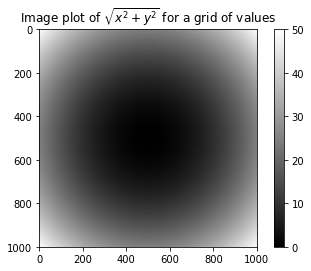

In [14]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray);plt.colorbar()

### 条件逻辑表达式参与数组运算

In [15]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [18]:
# list comprehension
res = [x if c else y
         for x, y, c in zip(xarr, yarr, cond)]
res

[1.1, 2.2, 1.3, 1.4, 2.5]

In [19]:
res = np.where(cond, xarr, yarr)
res

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [21]:
%timeit [x if c else y for x, y, c in zip(xarr, yarr, cond)]

1.7 µs ± 112 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [22]:
%timeit np.where(cond, xarr, yarr)

831 ns ± 54.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [23]:
# set random seed
np.random.seed(220184597)  # for reproducibility
arr = np.random.randn(4, 4)

In [24]:
arr

array([[ 2.13194131,  1.25525119,  1.81467858, -0.30114716],
       [ 0.21751827,  1.55465608, -0.52157873,  1.96755631],
       [ 1.13073424,  1.24582559, -0.30121276, -3.15685873],
       [ 1.40624609, -0.01703113,  0.9866528 ,  1.20214337]])

In [25]:
arr > 0

array([[ True,  True,  True, False],
       [ True,  True, False,  True],
       [ True,  True, False, False],
       [ True, False,  True,  True]])

In [26]:
np.where(arr>0, 1, -1)

array([[ 1,  1,  1, -1],
       [ 1,  1, -1,  1],
       [ 1,  1, -1, -1],
       [ 1, -1,  1,  1]])

In [27]:
np.where(arr>0, 1, arr)  # set only positive values to 1

array([[ 1.        ,  1.        ,  1.        , -0.30114716],
       [ 1.        ,  1.        , -0.52157873,  1.        ],
       [ 1.        ,  1.        , -0.30121276, -3.15685873],
       [ 1.        , -0.01703113,  1.        ,  1.        ]])

### 数学和统计方法

使用**聚合(aggregations)方法**,like sum, mean, std and so on.<br/>
或者**聚合模块**, like np.mutiply, np.subtract and so on.


In [6]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
np.mean(arr)

5.5

In [8]:
arr.mean()

5.5

In [9]:
arr.sum()

66

In [10]:
arr.mean(axis=1)  # compute sum down the columns

array([1.5, 5.5, 9.5])

In [11]:
arr.mean(axis=1, keepdims=True)  # 真实形状为(3, 1),np自动降维

array([[1.5],
       [5.5],
       [9.5]])

In [12]:
arr.sum(axis=0)  # compute mean across the rows

array([12, 15, 18, 21])

In [13]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66])

In [14]:
arr.cumsum(axis=1)  # compute mean across the columns

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

In [16]:
arr.cumprod(axis=0)  # compute sum down the rows

array([[  0,   1,   2,   3],
       [  0,   5,  12,  21],
       [  0,  45, 120, 231]])

![Basic array statistical methods](res/imgs/chp4_numpy_basics/basic_arr_stat_methods.png)

**聚合模块**<br/>
使用**聚合模块中的方法**等价与使用**聚合方法**

聚合模块：
- np.add
- np.subtract
- np.mutiply and so on

聚合模块下的方法:
- reduce(x)  整体聚合值 
- accumulate(x)  局部聚合值
- reduceat(x, bins)  切片聚合值
- outer(x, y)   外积操作

![ufunc methods](res/imgs/chp4_numpy_basics/ufunc_methods.png)

In [17]:
arr = np.arange(3)
arr

array([0, 1, 2])

In [19]:
np.add.reduce(arr)  # np.sum(arr)

3

In [26]:
# set random seed
np.random.seed(220184597)  # for reproducibility
arr = np.random.rand(5, 5)
arr

array([[0.37492806, 0.88559736, 0.46074829, 0.29729173, 0.01189081],
       [0.21179707, 0.61108896, 0.64891552, 0.77987183, 0.93483975],
       [0.84472202, 0.19226183, 0.85530596, 0.58178298, 0.7900313 ],
       [0.92529511, 0.20136265, 0.06560001, 0.91897442, 0.51044818],
       [0.37070641, 0.0763342 , 0.2905703 , 0.67018121, 0.65250641]])

In [27]:
arr[::2].sort(1)  # sort a few rows

In [28]:
cmp_res = arr[:, :-1] < arr[:, 1:]
cmp_res

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True,  True,  True]])

In [29]:
np.logical_and.reduce(cmp_res, axis=1)  # np.all(cmp_res, axis=1)

array([ True,  True,  True, False,  True])

In [2]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [3]:
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]])

In [4]:
# pairwise cross(outer) product(mutiply)
np.multiply.outer(np.arange(3), np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8]])

In [5]:
x, y = np.arange(12).reshape((3, 4)), np.arange(5)

In [6]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
y

array([0, 1, 2, 3, 4])

In [8]:
res = np.subtract.outer(x, y)  # pairwise cross(outer) subtract(subtract)

In [9]:
res.shape # x.shape + y.shape

(3, 4, 5)

In [10]:
res

array([[[ 0, -1, -2, -3, -4],
        [ 1,  0, -1, -2, -3],
        [ 2,  1,  0, -1, -2],
        [ 3,  2,  1,  0, -1]],

       [[ 4,  3,  2,  1,  0],
        [ 5,  4,  3,  2,  1],
        [ 6,  5,  4,  3,  2],
        [ 7,  6,  5,  4,  3]],

       [[ 8,  7,  6,  5,  4],
        [ 9,  8,  7,  6,  5],
        [10,  9,  8,  7,  6],
        [11, 10,  9,  8,  7]]])

In [12]:
arr = np.arange(10)
np.add.reduceat(arr, [0, 5, 8])  # partial operations arr[0:5], arr[5,8], arr[8:]

array([10, 18, 17])

### 布尔数组方法

In [17]:
# set random seed
np.random.seed(220184597)  # for reproducibility
arr = np.random.randn(100)
arr

array([[ 0.87138041, -0.28264   , -1.84658835, -0.35756678,  1.5950559 ,
         1.18989005, -0.3739512 ,  0.41889251,  0.25211422,  1.09530964],
       [ 0.02094619,  0.8399469 , -0.66578667, -0.20318361,  0.99049531,
        -1.21893087, -0.74467721,  1.98270989, -0.25991759, -0.24202876],
       [-0.61192508,  0.25574186, -1.17646844, -0.18870868, -1.42467947,
        -0.66362553, -1.53972865, -1.01223069, -0.20782873,  0.70948246],
       [-1.36911532, -0.86516806, -0.49157065, -0.61087678,  0.24182001,
        -0.05950617, -0.88840215,  0.70997706,  3.26735618,  1.16826394],
       [-1.03882465, -0.3803268 ,  0.71161981, -0.7508763 , -0.26036999,
        -0.42580673, -0.69162636,  1.52824662,  2.37292865, -0.13197053],
       [-1.00558474,  0.03868978, -0.15282881,  0.21324775,  0.75785744,
        -1.34604543, -0.03864808,  1.8160781 , -1.11733177,  0.15452459],
       [ 0.48481139, -1.15359413, -1.12073108,  0.68689409,  1.91747009,
         1.19290706, -1.12084974,  1.43414439

In [18]:
res = arr > 0
res

array([[ True, False, False, False,  True,  True, False,  True,  True,
         True],
       [ True,  True, False, False,  True, False, False,  True, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
         True],
       [False, False, False, False,  True, False, False,  True,  True,
         True],
       [False, False,  True, False, False, False, False,  True,  True,
        False],
       [False,  True, False,  True,  True, False, False,  True, False,
         True],
       [ True, False, False,  True,  True,  True, False,  True, False,
         True],
       [ True,  True,  True, False, False, False,  True, False, False,
        False],
       [ True, False,  True,  True,  True,  True,  True,  True, False,
        False]])

In [19]:
res.sum()  # numbers of positive values

41

In [31]:
arr = np.array([[False, False, False, False],
                 [ True, False, False, False],
                 [ True,  True, False, False],
                 [ True,  True,  True, False],
                 [ True,  True,  True, False]
                ])

In [32]:
arr.any()

True

In [33]:
arr.all()

False

In [34]:
arr.any(axis=1)

array([False,  True,  True,  True,  True])

In [35]:
arr.all(axis=1)

array([False, False, False, False, False])

**当arr为布尔数组时**
- arr.sum():计算时True为1，False为0，
- arr.any():存在一个数组元素为True，结果为True，否则为False
- arr.all():所有数组元素为True，结果为True，否则为False

### 排序

np.sort() sorted **in-place** like sort() built-in python 

In [6]:
# set random seed
np.random.seed(220184597)  # for reproducibility
arr = np.random.randn(5, 3)
arr

array([[ 0.87138041, -0.28264   , -1.84658835],
       [-0.35756678,  1.5950559 ,  1.18989005],
       [-0.3739512 ,  0.41889251,  0.25211422],
       [ 1.09530964,  0.02094619,  0.8399469 ],
       [-0.66578667, -0.20318361,  0.99049531]])

In [7]:
arr.sort()
arr

array([[-1.84658835, -0.28264   ,  0.87138041],
       [-0.35756678,  1.18989005,  1.5950559 ],
       [-0.3739512 ,  0.25211422,  0.41889251],
       [ 0.02094619,  0.8399469 ,  1.09530964],
       [-0.66578667, -0.20318361,  0.99049531]])

In [9]:
ravel_arr = arr.ravel()
ravel_arr[int(0.2 * len(ravel_arr))]  # 20% quantile 

-0.3575667766821383

**NumPy**的顺序已经在"改变数组形状"小节已经提及<br/>
**C/row** major order<br/>
&emsp;&emsp;Traverse higher dimensions first (e.g., axis 1 before advancing on axis 0).<br/>
**Fortran/column** major order<br/>
&emsp;&emsp;Traverse higher dimensions last (e.g., axis 0 before advancing on axis 1).<br/>

在**Pandas**可以按照索引(**index**)或者列(**columns**)进行更多的排序选择。

### 独特性和其他集合逻辑

**注意**<br/>
数据集合逻辑操作返回的都是**有序**的数组<br/>
e.g. **np.unique()**返回数组中**有序**独特的值

In [22]:
names = np.array(['Joe', 'Bob', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [11]:
res = np.unique(names)  # sorted(set(names))
type(res), res

(numpy.ndarray, array(['Bob', 'Joe', 'Will'], dtype='<U4'))

In [12]:
res = np.unique(names, return_counts=True)
type(res), res

(tuple, (array(['Bob', 'Joe', 'Will'], dtype='<U4'), array([2, 3, 2])))

In [20]:
part_names= np.array(['Will', 'Tom', 'Jony'])
part_names

array(['Will', 'Tom', 'Jony'], dtype='<U4')

In [28]:
np.in1d(part_names, names)

array([ True, False, False])

In [27]:
np.setdiff1d(names, part_names)

array(['Bob', 'Joe'], dtype='<U4')

In [24]:
np.setxor1d(names, part_names)

array(['Bob', 'Joe', 'Jony', 'Tom'], dtype='<U4')

![ufunc methods](res/imgs/chp4_numpy_basics/ufunc_methods.png)

## 4.4 关于数组的文件输入与输出

**NumPy**处理**二进制数据**(binary data)，即多维数组<br/>
- numpy.save : Save a single array to a binary file in NumPy format.
- numpy.savetxt : Save an array to a file as plain text.
- numpy.savez : Save several arrays into an uncompressed ``.npz`` file format
- numpy.load : Load the files created by savez_compressed.

<br/>

**Pandas**处理文本文件，**表格数据**(text or tabular data)


In [52]:
a_arr = np.arange(10)
b_arr = np.arange(10)
a_arr, (a_arr==b_arr).all(), a_arr is b_arr  # a_arr内容相同，引用不同

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), True, False)

In [36]:
dir = 'res/temp_data/'
import os
if not os.path.exists(dir):
    os.makedirs(dir)

In [37]:
np.save(dir + 'some_array', a_arr)  # *.npy， default compressed 

In [38]:
np.load(dir + 'some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
np.savez(dir + 'some_array_uncompressed', _arr)  # *.npz uncompressed

In [49]:
np.savez(dir + 'array_archive.npz', a=a_arr, b=b_arr)  # *.npz pass arr as 'keyword' parameters, uncompressed 

In [40]:
arch = np.load(dir + 'array_archive.npz')

In [41]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
np.savez_compressed(dir +'arrays_compressed.npz', a=a_arr, b=b_arr)  # compressed savez

**小结**<br/>
np.save()保存数组<br/>
np.load()载入数组<br/>
而np.savez()使用关键字参数保存多数组<br/>
而np.savez_compressed()在此基础上实现数组压缩存储<br/>

以**arr = np.arange(10)**存储为例
- np.save(dir + 'some_array', arr)&emsp;&emsp;**208** bytes
- np.savez(dir + 'some_array_uncompressed', arr)&emsp;&emsp;**324** bytes
- np.savez(dir + 'array_archive.npz', a=arr, b=arr)&emsp;&emsp;**610** bytes
- np.savez_compressed(dir +'arrays_compressed.npz', a=arr, b=arr)&emsp;&emsp;**384** bytes

可以看出np压缩存储具有相同元素的多数组效率高<br/>
即np存储**二进制文件**存储效率高

## 4.5 线性代数

**二维数组**能像MATLAB里的**矩阵**进行**线性代数运算**<br/>
**numpy.linalg**模块包含矩阵分解，逆运算，行列式等**矩阵操作**

**注意**<br/>
\*在NumPy里是阵列运算，即**逐元素相乘**<br/>
**np.dot(a, b)**才进行**矩阵乘法**运算

In [54]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [55]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [56]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [57]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [59]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

In [4]:
# 矩阵操作
from numpy.linalg import inv, qr
# set random seed
np.random.seed(220184597)  # for reproducibility
arr = np.random.random((5, 5))
mat = arr.T.dot(arr)
mat

array([[0.61494786, 0.49141951, 0.41891914, 0.44537747, 0.66624422],
       [0.49141951, 1.15854235, 0.61214155, 0.70680998, 0.77291793],
       [0.41891914, 0.61214155, 1.1197921 , 1.0179058 , 0.69520667],
       [0.44537747, 0.70680998, 1.0179058 , 1.40904459, 1.03881261],
       [0.66624422, 0.77291793, 0.69520667, 1.03881261, 1.11824529]])

In [5]:
inv(mat)

array([[ 11.28243222,   0.58870868,  -4.72870566,   8.38703271,
        -11.98038252],
       [  0.58870868,   1.78168308,  -0.90377946,   1.03240098,
         -1.97941919],
       [ -4.72870566,  -0.90377946,   4.88952034,  -5.96829154,
          5.94657501],
       [  8.38703271,   1.03240098,  -5.96829154,  10.55748227,
        -11.80762664],
       [-11.98038252,  -1.97941919,   5.94657501, -11.80762664,
         16.6721936 ]])

In [6]:
mat.dot(inv(mat))  # I

array([[ 1.00000000e+00,  4.66965598e-17, -4.63912553e-16,
         8.78234728e-16, -2.84016574e-15],
       [ 3.81468574e-16,  1.00000000e+00, -3.16119891e-16,
         1.07134671e-15, -1.42025644e-15],
       [ 1.18968846e-15,  4.08819607e-16,  1.00000000e+00,
         8.30021818e-16, -1.45573704e-15],
       [-4.88343095e-16,  3.74067983e-16,  1.41317805e-15,
         1.00000000e+00, -1.39695561e-15],
       [-1.80196819e-15,  6.45203732e-16,  1.29657415e-16,
        -2.78412031e-16,  1.00000000e+00]])

In [10]:
q, r = qr(mat)  # QR decomposition

In [11]:
q  # 正交矩阵

array([[-0.47312735,  0.41481892,  0.61300702, -0.47556628, -0.04620473],
       [-0.32833712, -0.87234036,  0.20165348, -0.19646997,  0.22793082],
       [-0.54349103,  0.09211346,  0.15585771,  0.8093795 ,  0.12940561],
       [-0.40423487, -0.13097291, -0.33191429, -0.058292  , -0.8401638 ],
       [-0.45777386,  0.2032456 , -0.67014889, -0.27702551,  0.47253745]])

In [12]:
r  # 上三角矩阵

array([[-1.90008958e+00, -1.89423850e+00, -2.59920843e+00,
        -2.22715139e+00, -2.52013388e+00],
       [ 0.00000000e+00, -6.56542117e-01, -1.78864299e-01,
        -2.12544734e-01, -1.22321811e-02],
       [ 0.00000000e+00,  0.00000000e+00, -2.00452269e-01,
        -3.22143430e-01, -5.17871339e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.60822483e-16,  6.49053461e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.98906199e-17]])

![Commonly used numpy.linalg functions](res/imgs/chp4_numpy_basics/np_linalg_funcs.png)

## 4.6 伪随机数生成

**numpy.random**模块高效生成随机数组<br/>
built-in Python **random**模块一次产生**一个**随机数<br/>
它们都根据**seed**(种子)生成**伪**随机数，seed为一个Long Integer，seed不变，生成的随机数序列不变<br/>
默认seed跟当前的时间有关，所以我们看到生成的数是随机的。

In [17]:
normal_arr = np.random.normal(loc=0, scale=1, size=(100, 100))
normal_arr

array([[-1.50910538, -2.29173861,  0.42008407, ..., -2.66478567,
        -0.09324736,  0.56775331],
       [-0.15513291,  0.31473122,  0.12272164, ...,  1.50646719,
         2.39518913,  0.73155772],
       [ 0.71368098,  0.73760068,  0.89497582, ..., -0.04614579,
         1.03618017, -0.52673353],
       ...,
       [ 0.84170301, -0.06042933, -1.0724445 , ..., -0.09871598,
        -0.52696687, -0.539376  ],
       [-0.30368888,  1.42657304,  2.01730019, ..., -1.2306219 ,
         0.21829522,  0.03856722],
       [-1.57150323,  0.39097346, -0.87916063, ..., -1.05590774,
         0.91735463, -0.93165593]])

In [15]:
import matplotlib.pyplot as plt

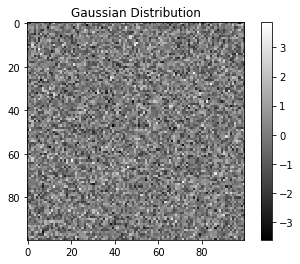

In [18]:
plt.title("Gaussian Distribution")
plt.imshow(normal_arr, cmap=plt.cm.gray);plt.colorbar()

看起来像黑白电视上杂乱无章的讯号（**高斯噪音**）

In [26]:
from random import seed, normalvariate
seed(220184597)  # for reproducibility)

In [24]:
N = normal_arr.size  # 10000
N

10000

In [27]:
%timeit normal_list = [normalvariate(mu=0, sigma=1) for i in range(N)]

7.69 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%timeit normal_arr = np.random.normal(N)

1.24 µs ± 47.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [30]:
np.random.seed(220184597)  # globally set seed

rng = np.random.RandomState(22018459)  # partially set
rng.randn(10)

array([ 0.37872575, -1.27099691,  0.6335365 ,  0.27117757,  0.75138129,
       -1.15025595, -0.69667911,  0.08520604, -2.39579047,  0.13778332])

![Partial list of numpy.random functions](res/imgs/chp4_numpy_basics/np_random_funcs.png)

**注意**：<br/>
np.random.**shuffle(arr)**在原数组上直接随机打乱顺序(in-place)<br/>
np.random.permutation(arr)返回打乱顺序后的数组(copy)<br/>

## 4.7 示例: 随机步行

In [1]:
# pure built-in python random walk
import random
position = 0
walks = [position]
nsteps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walks.append(position)

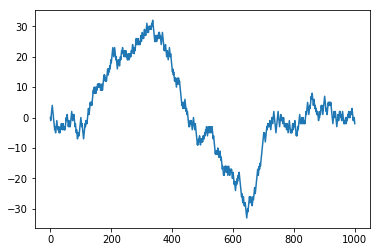

In [4]:
plt.plot(walks)

In [15]:
# numpy random walk
# set random seed
np.random.seed(220184597)  # for reproducibility
nsteps = 1000
draw = np.random.randint(0, 2, size=nsteps)
steps = np.where(draw > 0, 1, -1)
walks = steps.cumsum()

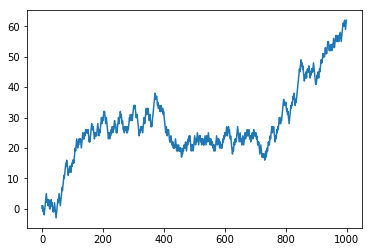

In [16]:
plt.plot(walks)

In [17]:
walks.max(),walks.min()

(62, -3)

In [18]:
np.abs(walks>=10).argmax()  # first 10 or -10

71

### 一次随机多次模拟随机步行

In [19]:
np.random.seed(220184597)  # for reproducibility
nwalks = 5000
nsteps = 1000
draw = np.random.randint(0, 2, size=(nwalks, nsteps))  # 5000次步行，每次1000步
steps = np.where(draw > 0, 1, -1)
walks = steps.cumsum(1)

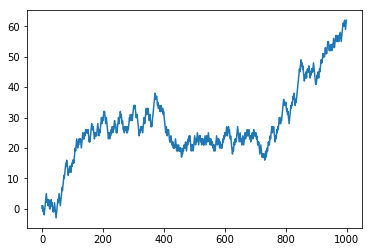

In [21]:
plt.plot(walks[0])

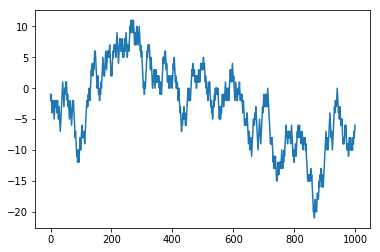

In [22]:
plt.plot(walks[1])

还可以试试**其他的分布**生成随机数组，例如**正态分布**

In [23]:
# normal distributions
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

## 4.8 结论

**NumPy**能够高效、便捷地处理**多维数组**